In [1]:
import xarray as xr

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:

dfesm=pd.read_excel("https://github.com/benmsanderson/esmperspective/raw/main/dfesm.xlsx",index_col=0)
dfhist=pd.read_excel("https://github.com/benmsanderson/esmperspective/raw/main/dfhist.xlsx",index_col=0)


In [5]:
dfesm

,ACCESS-ESM1-5,BCC-CSM2-MR,CESM2,CNRM-ESM2-1,CanESM5,CanESM5-CanOE,MIROC-ES2L,MPI-ESM1-2-LR,MRI-ESM2-0,NorESM2-LM,UKESM1-0-LL
YEARS,,,,,,,,,,,
1850,0.1008,-0.17514,0.06198,0.18806,0.01518,0.096,-0.0766,-0.25864,0.09344,0.14006,-0.09314
1851,0.1948,-0.21314,0.04198,0.14106,-0.25782,0.114,-0.0086,-0.15164,-0.02656,0.00206,0.04886
1852,0.1768,-0.10914,-0.14302,0.14806,-0.25682,0.130,-0.1266,-0.12064,0.06944,0.19806,-0.10214
1853,-0.0532,-0.02614,-0.11402,0.12206,-0.15182,-0.062,-0.1506,-0.05164,0.01144,0.26806,-0.15114
1854,-0.0842,-0.03814,0.00098,0.11606,-0.03282,-0.231,-0.1426,0.13536,0.05644,-0.11294,-0.06014
...,...,...,...,...,...,...,...,...,...,...,...
2010,0.5618,0.93286,1.35298,0.53706,1.57118,1.703,0.5054,0.78736,0.74844,0.64406,0.98386
2011,0.6678,1.02786,1.27298,0.63906,1.67018,1.576,0.7664,1.03336,0.76944,0.53106,1.14486
2012,0.7418,1.09086,1.03598,0.63306,1.85718,1.685,0.8644,1.03736,0.82844,0.47806,1.00186


In [6]:

c=pd.read_csv('https://github.com/benmsanderson/esmperspective/raw/main/cmip6_esm-hist_co2s.csv',index_col=0)
c = c.reindex(sorted(c.columns), axis=1)

In [7]:
ghg_cmip6 = pd.read_csv('https://github.com/benmsanderson/esmperspective/raw/main/Supplementary_Table_UoM_GHGConcentrations-1-1-0_annualmeans_v2.csv', skiprows=21, index_col=0)
ghg_cmip6['CO2']

v YEARS/GAS >
1850    284.32
1851    284.45
1852    284.60
1853    284.73
1854    284.85
         ...  
2010    388.72
2011    390.94
2012    393.02
2013    395.72
2014    397.55
Name: CO2, Length: 165, dtype: float64

In [8]:
models=c.columns

{'EC-Earth3-CC': 431.8550160313155,
 'GFDL-ESM4': 419.3452922621145,
 'CESM2': 415.0675708752133,
 'UKESM1-0-LL': 412.9112176602771,
 'CanESM5': 410.0534728046186,
 'CanESM5-CanOE': 409.7569814178589,
 'NorESM2-LM': 406.5741312010064,
 'MPI-ESM1-2-LR': 406.32757617928064,
 'ACCESS-ESM1-5': 392.2074114410602,
 'MIROC-ES2L': 385.9967796252242,
 'MRI-ESM2-0': 381.2009826413786,
 'BCC-CSM2-MR': 368.309187682758,
 'CNRM-ESM2-1': 348.0200539224229}

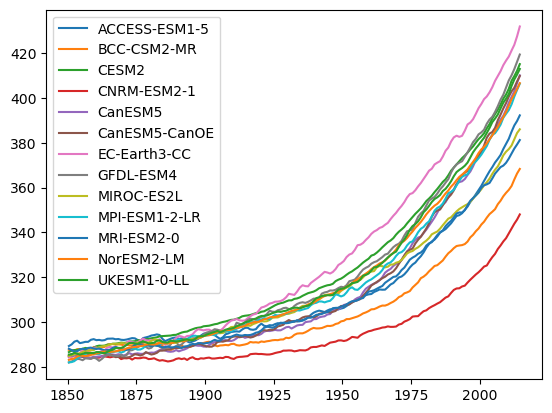

In [9]:
c.plot()
maxco2 = {}
for model in models:
    maxco2[model] = c[model].max()
models_sorted = {k: v for k, v in sorted(maxco2.items(), key=lambda item: item[1], reverse=True)}
models_sorted

In [10]:
palette = [
    '#6929c4',
    '#1192e8',
    '#005d5d',
    '#9f1853',
    '#fa4d56',
    '#570408',
    '#198038',
    '#002d9c',
    '#ee538b',
    '#b28600',
    '#009d9a',
    '#012749',
    '#8a3800',
]

colors=dict(zip(models_sorted.keys(), palette))

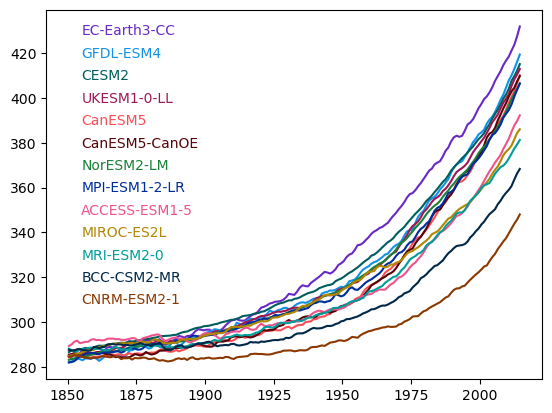

In [11]:
for i, model in enumerate(models_sorted):
    plt.plot(np.arange(1850.5, 2015), c[model], color=colors[model])
    plt.text(1855, 428-i*10, model, color=colors[model])

In [12]:
from urllib.request import urlopen

# load up Cowtan and Way data remotely
url = 'http://www-users.york.ac.uk/~kdc3/papers/coverage2013/had4_krig_annual_v2_0_0.txt'
response = urlopen(url)

CW = np.loadtxt(response)
CW[:,0]

array([1850., 1851., 1852., 1853., 1854., 1855., 1856., 1857., 1858.,
       1859., 1860., 1861., 1862., 1863., 1864., 1865., 1866., 1867.,
       1868., 1869., 1870., 1871., 1872., 1873., 1874., 1875., 1876.,
       1877., 1878., 1879., 1880., 1881., 1882., 1883., 1884., 1885.,
       1886., 1887., 1888., 1889., 1890., 1891., 1892., 1893., 1894.,
       1895., 1896., 1897., 1898., 1899., 1900., 1901., 1902., 1903.,
       1904., 1905., 1906., 1907., 1908., 1909., 1910., 1911., 1912.,
       1913., 1914., 1915., 1916., 1917., 1918., 1919., 1920., 1921.,
       1922., 1923., 1924., 1925., 1926., 1927., 1928., 1929., 1930.,
       1931., 1932., 1933., 1934., 1935., 1936., 1937., 1938., 1939.,
       1940., 1941., 1942., 1943., 1944., 1945., 1946., 1947., 1948.,
       1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957.,
       1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966.,
       1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975.,
       1976., 1977.,

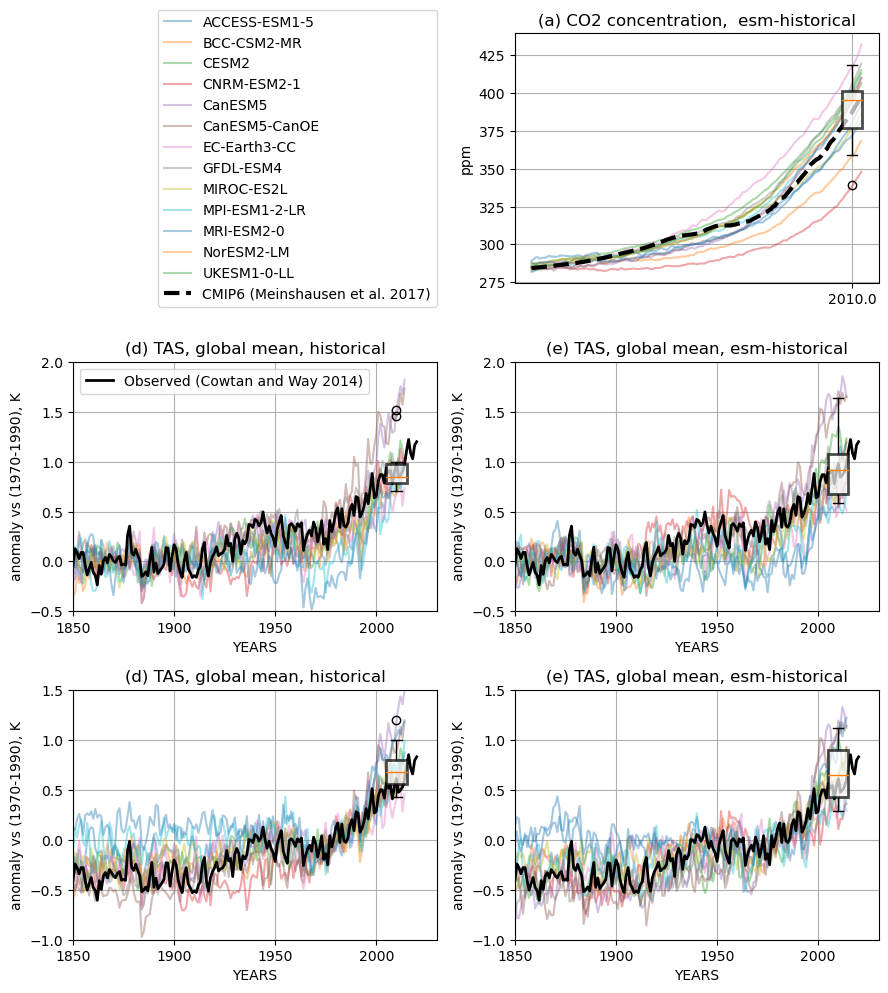

In [80]:
fig, ax= plt.subplots(3, 2,figsize=[9,10])
c.plot(ax=ax[0,1],alpha=0.4)
ax[0,0].set_visible(False)

#for i, model in enumerate(models_sorted):
#    ax[0,1].plot(np.arange(1850.5, 2015), c[model], color=colors[model])
#    ax[0,1].text(1855, 428-i*10, model, color=colors[model])
pc=ax[0,1].plot(np.arange(1850.5, 2015), ghg_cmip6['CO2'], color='k',linestyle='--', label='CMIP6 (Meinshausen et al. 2017)', lw=3)
ax[0,1].legend(pc,{'CMIP6 (Meinshausen et al. 2017)'})
bplot=ax[0,1].boxplot(c.iloc[-10:,:].mean(),positions=[2010.],widths=10,patch_artist=True)
bplot['boxes'][0].set_facecolor('w')
bplot['boxes'][0].set_alpha(0.7)
bplot['boxes'][0].set_linewidth(2)
ax[0,1].grid()
ax[0,1].set_ylabel('ppm')
ax[0,1].set_title('(a) CO2 concentration,  esm-historical')


(dfhist-dfhist.loc[1850:1900].mean()).plot(ax=ax[1,0],legend=False,alpha=0.4)
ax[1,0].grid()
ax[1,0].set_ylabel('anomaly vs (1970-1990), K')
ax[1,0].set_title('(d) TAS, global mean, historical')
ax[1,0].legend(pp,{'Observed (Cowtan and Way 2014)'})
bplot=ax[1,0].boxplot((dfhist-dfhist.loc[1850:1900].mean()).iloc[-10:,:].mean(),positions=[2010.],widths=10,patch_artist=True)
bplot['boxes'][0].set_facecolor('w')
bplot['boxes'][0].set_alpha(0.7)
bplot['boxes'][0].set_linewidth(2)
pp=ax[1,0].plot(CW[:,0],CW[:,1]-np.mean(CW[:50,1]),color='k',lw=2)
ax[1,0].set_ylim([-.5,2])
ax[1,0].set_xlim([1850,2030])
ax[1,0].set_xticks(np.arange(1850,2030,50))
ax[1,0].set_xticklabels(np.arange(1850,2030,50))

(dfesm-dfesm.loc[1850:1900].mean()).plot(ax=ax[1,1],legend=False,alpha=0.4)
ax[1,1].grid()
ax[1,1].set_ylabel('anomaly vs (1970-1990), K')
ax[1,1].set_title('(e) TAS, global mean, esm-historical')
#ax[2,1].legend(pp,{'Observed (Cowtan and Way 2014)'})
bplot=ax[1,1].boxplot((dfesm-dfesm.loc[1850:1900].mean()).iloc[-10:,:].mean(),positions=[2010.],widths=10,patch_artist=True)
bplot['boxes'][0].set_facecolor('w')
bplot['boxes'][0].set_alpha(0.7)
bplot['boxes'][0].set_linewidth(2)
pp=ax[1,1].plot(CW[:,0],CW[:,1]-np.mean(CW[:50,1]),color='k',lw=2)
ax[1,1].set_ylim([-.5,2])
ax[1,1].set_xlim([1850,2030])
ax[1,1].set_xticks(np.arange(1850,2030,50))
ax[1,1].set_xticklabels(np.arange(1850,2030,50))



(dfhist-dfhist.loc[1970:1990].mean()).plot(ax=ax[2,0],legend=False,alpha=0.4)
ax[2,0].grid()
ax[2,0].set_ylabel('anomaly vs (1970-1990), K')
ax[2,0].set_title('(d) TAS, global mean, historical')
#ax[2,0].legend(pp,{'Observed (Cowtan and Way 2014)'})
bplot=ax[2,0].boxplot((dfhist-dfhist.loc[1970:1990].mean()).iloc[-10:,:].mean(),positions=[2010.],widths=10,patch_artist=True)
bplot['boxes'][0].set_facecolor('w')
bplot['boxes'][0].set_alpha(0.7)
bplot['boxes'][0].set_linewidth(2)
pp=ax[2,0].plot(CW[:,0],CW[:,1]-np.mean(CW[120:140,1]),color='k',lw=2)
ax[2,0].set_ylim([-1,1.5])
ax[2,0].set_xlim([1850,2030])
ax[2,0].set_xticks(np.arange(1850,2030,50))
ax[2,0].set_xticklabels(np.arange(1850,2030,50))

(dfesm-dfesm.loc[1970:1990].mean()).plot(ax=ax[2,1],legend=False,alpha=0.4)
ax[2,1].grid()
ax[2,1].set_ylabel('anomaly vs (1970-1990), K')
ax[2,1].set_title('(e) TAS, global mean, esm-historical')
#ax[2,1].legend(pp,{'Observed (Cowtan and Way 2014)'})
bplot=ax[2,1].boxplot((dfesm-dfesm.loc[1970:1990].mean()).iloc[-10:,:].mean(),positions=[2010.],widths=10,patch_artist=True)
bplot['boxes'][0].set_facecolor('w')
bplot['boxes'][0].set_alpha(0.7)
bplot['boxes'][0].set_linewidth(2)
pp=ax[2,1].plot(CW[:,0],CW[:,1]-np.mean(CW[120:140,1]),color='k',lw=2)
ax[2,1].set_ylim([-1,1.5])
ax[2,1].set_xlim([1850,2030])
ax[2,1].set_xticks(np.arange(1850,2030,50))
ax[2,1].set_xticklabels(np.arange(1850,2030,50))

fig.tight_layout()
ax[0,1].legend(loc='center left', bbox_to_anchor=(-1.0, 0.5))

fig.savefig('fig4.png', dpi=300)
